# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score,auc
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import os
from scipy.sparse import hstack
from tqdm import tqdm
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [ ]:
project_data.head(2)

In [ ]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [ ]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

In [9]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

In [ ]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

In [ ]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

In [10]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [11]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:53<00:00, 962.91it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [12]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
project_title=project_data['project_title']
import re
preprocessed_title=[]
for i in project_title:
    i=i.replace('\\r',"")
    i=i.replace('\\n',"")
    i=i.replace('\\t',"")
    i=i.replace("'\'","")
    i=i.replace(":","")
    i=i.replace("'","")
    i=i.replace("-","")
    i=i.replace(",","")
    i=i.replace(".","")
    i=i.replace("'""'","")
    clean=re.sub('[^A-Za-z0-9]+'," ",i)
    word = ' '.join(e for e in clean.split() if e not in stopwords)
    preprocessed_title.append(word.lower().strip())

In [13]:
#https://simmonhessner.de/lammitize-whole-sentences-with-python-and-nltks-wordnetlemmatizer/
#lemmatizing the preprocessed_title
from nltk.stem import *
import nltk
from nltk.corpus import wordnet
lemmatizer=WordNetLemmatizer()
def nltk2wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
def lemmatize_sentence(sentence):
    nltk_tagged=nltk.pos_tag(nltk.word_tokenize(sentence))
    wn_tagged=map(lambda x:(x[0],nltk2wn_tag(x[1])),nltk_tagged)
    res_words=[]
    for word,tag in wn_tagged:
        if tag is None:
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word,tag))
    return " ".join(res_words)
from tqdm import tqdm
clean_title=[]
for word in tqdm(preprocessed_title):
    i=lemmatize_sentence(word)
    clean_title.append(i)

100%|██████████| 109248/109248 [03:18<00:00, 550.86it/s]


In [14]:
num_counter=[]
project_sumry=project_data['project_resource_summary'].str.split()
for i,sent in enumerate(project_sumry):
    for word in sent:
        if word.isdigit():
            num_counter.append(i)
numerical_digit=[]
for sent_i in range(len(project_sumry)):
    if sent_i in num_counter:
        numerical_digit.append(1)
    else:
        numerical_digit.append(0)
print(numerical_digit[4:20])
print(len(numerical_digit))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1]
109248


In [15]:
project_data.shape
project_data['project_sumry_digit']=numerical_digit
project_data['essay']= preprocessed_essays
essay_word_count = project_data['essay'].str.split().apply(len)
essay_word_count = essay_word_count.values
print(len(essay_word_count))

109248


In [16]:
project_data['title']= preprocessed_title
title_word_count = project_data['title'].str.split().apply(len)
title_word_count = title_word_count.values
print(len(title_word_count))

109248


In [17]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data['title_Count']=title_word_count
project_data['essay_Count']=essay_word_count

## 1.5 Preparing data for models

In [24]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'project_sumry_digit', 'title', 'price', 'quantity', 'title_Count',
       'essay_Count'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## __ Computing Sentiment Scores__

In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sentiment_com_essay=[]
sentiment_neg_essay=[]
sentiment_pos_essay=[]
for for_sentiment in tqdm(project_data['essay']):
    ss = sid.polarity_scores(for_sentiment)
    sentiment_com_essay.append(ss['compound'])
    sentiment_neg_essay.append(ss['neg'])
    sentiment_pos_essay.append(ss['pos'])
project_data['com_essay']=sentiment_com_essay
project_data['neg_essay']=sentiment_neg_essay
project_data['pos_essay']=sentiment_pos_essay

C:\ProgramData\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
100%|██████████| 109248/109248 [06:48<00:00, 267.72it/s]


#  SVM TASK

<ol>
    <li><strong>[Task-1]Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li>
        <ul>
    <li>Find the best hyper parameter which will give the maximum AUC value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv 
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li> plot the performance of model both on train data and cross validation data for each hyper parameter</li>
    <li>On best hyper parameter, train model with it, and plot the AUC on test data and plot the ROC curve on both train and test.
    </li>
    <li>Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points .</li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]  Support Vector Machines on these features by finding the best hyper paramter as  in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>summarize the results at the end of the notebook, summarize it in the table format. 
    </li>
        </ul>
</ol>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'project_sumry_digit', 'title', 'price', 'quantity', 'title_Count',
       'essay_Count', 'com_essay', 'neg_essay', 'pos_essay'],
      dtype='object')

In [19]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.model_selection import train_test_split
project_data=project_data[['teacher_prefix', 'school_state', 'project_grade_category', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity','project_is_approved','project_sumry_digit'
                          , 'title_Count', 'essay_Count','title','com_essay','neg_essay','pos_essay']]
project_data=project_data.dropna()
y=project_data['project_is_approved']
x=project_data[['teacher_prefix', 'school_state', 'project_grade_category', 'title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity','project_sumry_digit'
                          , 'title_Count', 'essay_Count','com_essay','neg_essay','pos_essay']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.1,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_cv.shape)
print(y_cv.shape)
print(x_train.columns)

(68823, 17)
(68823,)
(32774, 17)
(32774,)
(7648, 17)
(7648,)
Index(['teacher_prefix', 'school_state', 'project_grade_category', 'title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity',
       'project_sumry_digit', 'title_Count', 'essay_Count', 'com_essay',
       'neg_essay', 'pos_essay'],
      dtype='object')


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [29]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
my_counter=Counter()
for grade in x_train['school_state'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
sort_project_grade_cat=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sort_project_grade_cat),lowercase=False, binary=True)
vectorizer.fit(x_train['school_state'])
    # vectorizing 
school_state_one_hot_train = vectorizer.transform(x_train['school_state'])
school_state_one_hot_cv = vectorizer.transform(x_cv['school_state'])
school_state_one_hot_test = vectorizer.transform(x_test['school_state'])


In [30]:
from sklearn.preprocessing import Normalizer

my_counter=Counter()
for grade in x_train['clean_subcategories'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
sorted_sub_cat_dict=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()),\
lowercase=False, binary= True) 
vectorizer.fit(x_train['clean_subcategories'].values)

subcategories_one_hot_train=vectorizer.transform(x_train['clean_subcategories'])
subcategories_one_hot_test=vectorizer.transform(x_test['clean_subcategories'])
subcategories_one_hot_cv=vectorizer.transform(x_cv['clean_subcategories'])

In [32]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
def vectorization(data):
    my_counter=Counter()
    for grade in data:
        my_counter.update(grade.split())
    dict_my_counter=dict(my_counter)
    sort_project_grade_cat=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
    if 'Grades' in dict_my_counter:
        dict_my_counter.pop('Grades')
    vectorizer = CountVectorizer(vocabulary=list(sort_project_grade_cat),lowercase=False, binary=True)
    vectorizer.fit(data)
    # vectorizing 
    project_grade_category_one_hot = vectorizer.transform(data)
    return project_grade_category_one_hot
#vectorizing of teacher prefix
def teacher_prefix_vec(data):
    my_counter=Counter()
    for prefix in data.values:
        my_counter.update(str(prefix).split())
    dict_my_counter=dict(my_counter)
    sort_teacher_prefix_cat=dict(sorted(dict_my_counter.items()), key=lambda kv: kv[1])
    if 'nan' in sort_teacher_prefix_cat.keys():
        sort_teacher_prefix_cat.pop('nan')
    vectorizer = CountVectorizer(vocabulary=list(sort_teacher_prefix_cat),lowercase=False, binary=True)
    vectorizer.fit(data.values.astype('U'))
    project_teacher_prefix_one_hot = vectorizer.transform(data.values.astype('U'))
    return project_teacher_prefix_one_hot

In [33]:
import warnings
warnings.filterwarnings("ignore")
grade_cat_one_hot_train=vectorization(x_train['project_grade_category'])
grade_cat_one_hot_test=vectorization(x_test['project_grade_category'])
grade_cat_one_hot_cv=vectorization(x_cv['project_grade_category'])
categories_one_hot_train=vectorization(x_train['clean_categories'])
categories_one_hot_test=vectorization(x_test['clean_categories'])
categories_one_hot_cv=vectorization(x_cv['clean_categories'])

from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
normalizer.fit(x_train['price'].values.reshape(-1,1))
price_one_hot_train = normalizer.transform(x_train['price'].values.reshape(-1,1)) 
price_one_hot_test = normalizer.transform(x_test['price'].values.reshape(-1,1)) 
price_one_hot_cv = normalizer.transform(x_cv['price'].values.reshape(-1,1)) 
normalizer.fit(x_train['quantity'].values.reshape(-1,1))
quantity_one_hot_train=normalizer.transform(x_train['price'].values.reshape(-1,1))
quantity_one_hot_test=normalizer.transform(x_test['price'].values.reshape(-1,1))
quantity_one_hot_cv=normalizer.transform(x_cv['price'].values.reshape(-1,1))

In [34]:
my_counter=Counter()
for grade in x_train['teacher_prefix'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
sorted_sub_cat_dict=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()),\
lowercase=False, binary= True) 
vectorizer.fit(x_train['teacher_prefix'].values)

teacher_prefix_one_hot_train=vectorizer.transform(x_train['teacher_prefix'])
teacher_prefix_one_hot_test=vectorizer.transform(x_test['teacher_prefix'])
teacher_prefix_one_hot_cv=vectorizer.transform(x_cv['teacher_prefix'])
teacher_prefix_one_hot_cv.shape

(7648, 5)

In [35]:
print(school_state_one_hot_cv.shape)
print(school_state_one_hot_train.shape)
print(school_state_one_hot_test.shape)
print(quantity_one_hot_cv.shape)
print(quantity_one_hot_train.shape)
print(quantity_one_hot_test.shape)

print(price_one_hot_cv.shape)
print(price_one_hot_train.shape)
print(price_one_hot_test.shape)

print(subcategories_one_hot_cv.shape)
print(subcategories_one_hot_train.shape)
print(subcategories_one_hot_test.shape)
print(categories_one_hot_cv.shape)
print(categories_one_hot_train.shape)
print(categories_one_hot_test.shape)
print(grade_cat_one_hot_cv.shape)
print(grade_cat_one_hot_train.shape)
print(grade_cat_one_hot_test.shape)
print(teacher_prefix_one_hot_cv.shape)
print(teacher_prefix_one_hot_train.shape)
print(teacher_prefix_one_hot_test.shape)

(7648, 51)
(68823, 51)
(32774, 51)
(7648, 1)
(68823, 1)
(32774, 1)
(7648, 1)
(68823, 1)
(32774, 1)
(7648, 30)
(68823, 30)
(32774, 30)
(7648, 9)
(68823, 9)
(32774, 9)
(7648, 5)
(68823, 5)
(32774, 5)
(7648, 5)
(68823, 5)
(32774, 5)


In [36]:
num_or_not_train=x_train['project_sumry_digit'].values.reshape(-1,1)
num_or_not_test=x_test['project_sumry_digit'].values.reshape(-1,1)
num_or_not_cv=x_cv['project_sumry_digit'].values.reshape(-1,1)
num_or_not_train.shape

(68823, 1)

In [37]:
essay_count_train=x_train['essay_Count'].values.reshape(-1,1)
essay_count_test=x_test['essay_Count'].values.reshape(-1,1)
essay_count_cv=x_cv['essay_Count'].values.reshape(-1,1)
essay_count_train.shape

(68823, 1)

In [38]:
title_count_train=x_train['title_Count'].values.reshape(-1,1)
title_count_test=x_test['title_Count'].values.reshape(-1,1)
title_count_cv=x_cv['title_Count'].values.reshape(-1,1)
title_count_train.shape

(68823, 1)

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [39]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis labe
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
def bow(data): 
    text_bow = vectorizer.transform(data)
    return text_bow
vectorizer.fit(x_train['essay'])
bow_train_essay=bow(x_train['essay'])
bow_test_essay=bow(x_test['essay'])
bow_cv_essay=bow(x_cv['essay'])
#bow of v
vectorizer=CountVectorizer(min_df=10)
vectorizer.fit(x_train['title'])
bow_train_title=bow(x_train['title'])
bow_test_title=bow(x_test['title'])
bow_cv_title=bow(x_cv['title'])


In [40]:
print(bow_cv_title.shape)
print(bow_train_title.shape)
print(bow_test_title.shape)
print(bow_cv_essay.shape)
print(bow_train_essay.shape)
print(bow_test_essay.shape)

(7648, 2541)
(68823, 2541)
(32774, 2541)
(7648, 5000)
(68823, 5000)
(32774, 5000)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['essay'])
tfidf_train_essay = vectorizer.transform(x_train['essay'])
tfidf_test_essay = vectorizer.transform(x_test['essay'])
tfidf_cv_essay = vectorizer.transform(x_cv['essay'])
print(tfidf_train_essay.shape)
print(tfidf_test_essay.shape)
print(tfidf_cv_essay.shape)

(68823, 13888)
(32774, 13888)
(7648, 13888)


In [41]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['title'])
tfidf_train_title = vectorizer.transform(x_train['title'])
tfidf_test_title = vectorizer.transform(x_test['title'])
tfidf_cv_title = vectorizer.transform(x_cv['title'])
print(tfidf_train_title.shape)
print(tfidf_test_title.shape)
print(tfidf_cv_title.shape)

(68823, 2541)
(32774, 2541)
(7648, 2541)


In [42]:
# average Word2Vec
# compute average word2vec for each review.
def avg_w2v(data):
    with open('glove_vectors', 'rb') as f:
        model = pickle.load(f)
        glove_words =  set(model.keys())
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in data: # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors



# average Word2Vec
# compute average word2vec for each review
def tfidf_weighted_w2v(data,tfidf_words):
    with open('glove_vectors', 'rb') as f:
        model = pickle.load(f)
        glove_words =  set(model.keys())
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in data: # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors

In [43]:
avgw2v_train_essay=avg_w2v(x_train['essay'])
avgw2v_test_essay=avg_w2v(x_test['essay'])
avgw2v_cv_essay=avg_w2v(x_cv['essay'])
avgw2v_train_title=avg_w2v(x_train['title'])
avgw2v_test_title=avg_w2v(x_test['title'])
avgw2v_cv_title=avg_w2v(x_cv['title'])


tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['essay'])# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
wtw2v_train_essay=tfidf_weighted_w2v(x_train['essay'],tfidf_words)
wtw2v_test_essay=tfidf_weighted_w2v(x_test['essay'],tfidf_words)
wtw2v_cv_essay=tfidf_weighted_w2v(x_cv['essay'],tfidf_words)


tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['title'])# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
wtw2v_train_title=tfidf_weighted_w2v(x_train['title'],tfidf_words)
wtw2v_test_title=tfidf_weighted_w2v(x_test['title'],tfidf_words)
wtw2v_cv_title=tfidf_weighted_w2v(x_cv['title'],tfidf_words)

In [44]:
pos_train_essay=x_train['pos_essay'].values.reshape(-1,1)
neg_train_essay=x_train['neg_essay'].values.reshape(-1,1)
com_train_essay=x_train['com_essay'].values.reshape(-1,1)
pos_cv_essay=x_cv['pos_essay'].values.reshape(-1,1)
neg_cv_essay=x_cv['neg_essay'].values.reshape(-1,1)
com_cv_essay=x_cv['com_essay'].values.reshape(-1,1)
pos_test_essay=x_test['pos_essay'].values.reshape(-1,1)
neg_test_essay=x_test['neg_essay'].values.reshape(-1,1)
com_test_essay=x_test['com_essay'].values.reshape(-1,1)

<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [44]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from scipy.sparse import hstack
train_bow=hstack((teacher_prefix_one_hot_train,school_state_one_hot_train,num_or_not_train,\
grade_cat_one_hot_train,categories_one_hot_train,subcategories_one_hot_train,price_one_hot_train,\
quantity_one_hot_train,bow_train_essay,bow_train_title,essay_count_train,title_count_train)).tocsr()
cv_bow=hstack((teacher_prefix_one_hot_cv,school_state_one_hot_cv,num_or_not_cv,\
grade_cat_one_hot_cv,categories_one_hot_cv,subcategories_one_hot_cv,price_one_hot_cv,\
quantity_one_hot_cv,bow_cv_essay,bow_cv_title,essay_count_cv,title_count_cv)).tocsr()

print(train_bow.shape)
print(cv_bow.shape)


(68823, 7646)
(7648, 7646)


In [116]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score,auc
train_auc=[]
cv_auc=[]
alpha=[10**i for i in range(-7,1)]
for alf in tqdm(alpha):
    model=SGDClassifier(loss='hinge',alpha=alf,penalty='l2')
    model.fit(train_bow,y_train)
    y_train_prob=[]
    y_train_prob=model.decision_function(train_bow)
    y_cv_prob=[]
    y_cv_prob=model.decision_function(cv_bow)
    train_auc.append(roc_auc_score(y_train,y_train_prob))
    cv_auc.append(roc_auc_score(y_cv,y_cv_prob))




  0%|          | 0/8 [00:00<?, ?it/s]


 12%|█▎        | 1/8 [00:14<01:41, 14.46s/it]


 25%|██▌       | 2/8 [00:25<01:20, 13.49s/it]


 38%|███▊      | 3/8 [00:39<01:07, 13.46s/it]


 50%|█████     | 4/8 [00:51<00:52, 13.20s/it]


 62%|██████▎   | 5/8 [00:57<00:33, 11.10s/it]


 75%|███████▌  | 6/8 [01:00<00:17,  8.68s/it]


 88%|████████▊ | 7/8 [01:02<00:06,  6.43s/it]


100%|██████████| 8/8 [01:02<00:00,  4.65s/it]




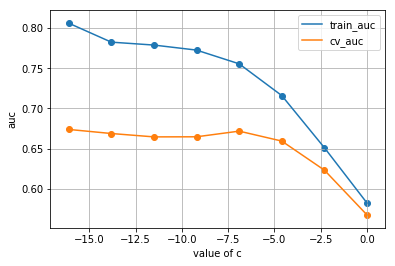

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]


In [117]:
import math
log_alpha=[math.log(i) for i in alpha]
plt.plot(log_alpha,train_auc,label='train_auc')
plt.plot(log_alpha,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(log_alpha,train_auc)
plt.scatter(log_alpha,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of c')
plt.show()
print(alpha)

In [129]:
sgd=SGDClassifier(loss='hinge')
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[10**i for i in range(-7,1)]}
clf=GridSearchCV(sgd,parameters,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(train_bow,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [127]:
clf.best_params_

{'alpha': 0.001, 'penalty': 'l2'}

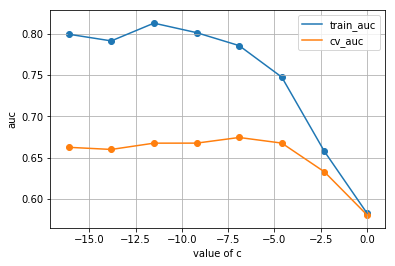

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]


In [130]:
import math
alpha=[10**i for i in range(-7,1)]
log_alpha=[math.log(i) for i in alpha]
plt.plot(log_alpha,train_auc,label='train_auc')
plt.plot(log_alpha,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(log_alpha,train_auc)
plt.scatter(log_alpha,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of c')
plt.show()
print(alpha)

In [123]:
test_bow=hstack((teacher_prefix_one_hot_test,school_state_one_hot_test,num_or_not_test,\
grade_cat_one_hot_test,categories_one_hot_test,subcategories_one_hot_test,price_one_hot_test,\
quantity_one_hot_test,bow_test_essay,bow_test_title,essay_count_test,title_count_test)).tocsr()
print(test_bow.shape)

(32774, 7646)


In [124]:
best_alpha = 0.001
from sklearn.metrics import roc_curve,auc
model=SGDClassifier(alpha=best_alpha,penalty='l2',loss='hinge')
model.fit(train_bow,y_train)
y_train_pred=[]
y_train_pred=model.decision_function(train_bow)
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_train_pred)
y_test_pred=[]
y_test_pred=model.decision_function(test_bow)
fpr_test,tpr_test,thresholds_test=roc_curve(y_test,y_test_pred)

Text(0,0.5,'True positive rate')

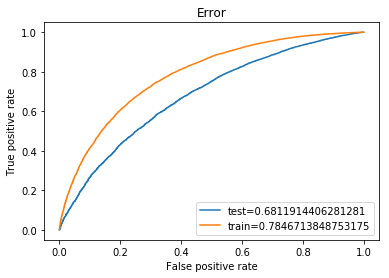

In [125]:
plt.title('Error')
plt.plot(fpr_test,tpr_test,label='test='+str(auc(fpr_test,tpr_test)))
plt.plot(fpr_train,tpr_train,label='train='+str(auc(fpr_train,tpr_train)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Train Confusion Matrix
[[ 2309  8044]
 [ 1448 57022]]


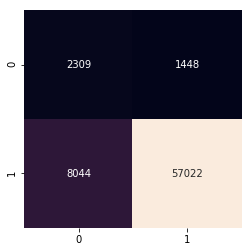

In [131]:
print('Train Confusion Matrix')
print(confusion_matrix(y_train,model.predict(train_bow)))
tn,fp,fn,tp=confusion_matrix(y_train,model.predict(train_bow)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

Test Confusion Matrix
[[  643  4419]
 [ 1008 26704]]


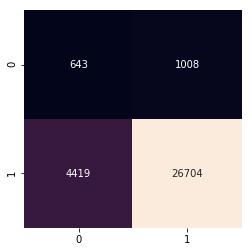

In [132]:
print('Test Confusion Matrix')
print(confusion_matrix(y_test,model.predict(test_bow)))
tn,fp,fn,tp=confusion_matrix(y_test,model.predict(test_bow)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

# Set 2

In [45]:
train_tfidf=hstack((teacher_prefix_one_hot_train,school_state_one_hot_train,num_or_not_train,\
grade_cat_one_hot_train,categories_one_hot_train,subcategories_one_hot_train,price_one_hot_train,\
quantity_one_hot_train,tfidf_train_essay,tfidf_train_title,essay_count_train,title_count_train)).tocsr()
cv_tfidf=hstack((teacher_prefix_one_hot_cv,school_state_one_hot_cv,num_or_not_cv,\
grade_cat_one_hot_cv,categories_one_hot_cv,subcategories_one_hot_cv,price_one_hot_cv,\
quantity_one_hot_cv,tfidf_cv_essay,tfidf_cv_title,essay_count_cv,title_count_cv)).tocsr()
test_tfidf=hstack((teacher_prefix_one_hot_test,school_state_one_hot_test,num_or_not_test,\
grade_cat_one_hot_test,categories_one_hot_test,subcategories_one_hot_test,price_one_hot_test,\
quantity_one_hot_test,tfidf_test_essay,tfidf_test_title,essay_count_test,title_count_test)).tocsr()
print(train_tfidf.shape)
print(test_tfidf.shape)
print(cv_tfidf.shape)

(68823, 127757)
(32774, 127757)
(7648, 127757)


In [ ]:
sgd=SGDClassifier(loss='hinge',penalty='l1')
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[10**i for i in range(-7,1)]}
clf=GridSearchCV(sgd,parameters,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(train_tfidf,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [138]:
clf.best_params_

{'alpha': 1e-07, 'penalty': 'l1'}

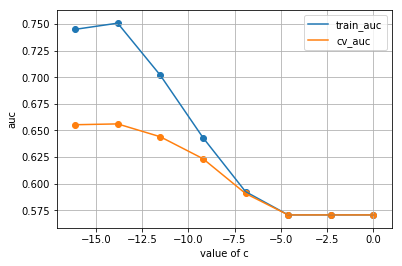

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]


In [146]:
import math
alpha=[10**i for i in range(-7,1)]
log_alpha=[math.log(i) for i in alpha]
plt.plot(log_alpha,train_auc,label='train_auc')
plt.plot(log_alpha,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(log_alpha,train_auc)
plt.scatter(log_alpha,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of alpha')
plt.show()
print(alpha)

In [49]:
best_alpha =1e-07
from sklearn.metrics import roc_curve,auc
model=SGDClassifier(alpha=best_alpha,penalty='l1',loss='hinge')
model.fit(train_tfidf,y_train)
y_train_pred=[]
y_train_pred=model.decision_function(train_tfidf)
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_train_pred)
y_test_pred=[]
y_test_pred=model.decision_function(test_tfidf)
fpr_test,tpr_test,thresholds_test=roc_curve(y_test,y_test_pred)

Text(0,0.5,'True positive rate')

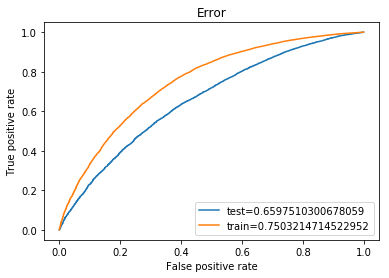

In [50]:
plt.title('Error')
plt.plot(fpr_test,tpr_test,label='test='+str(auc(fpr_test,tpr_test)))
plt.plot(fpr_train,tpr_train,label='train='+str(auc(fpr_train,tpr_train)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Train Confusion Matrix
[[  762  9591]
 [  443 58027]]


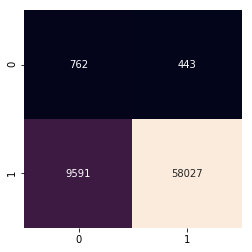

In [51]:
print('Train Confusion Matrix')
print(confusion_matrix(y_train,model.predict(train_tfidf)))
tn,fp,fn,tp=confusion_matrix(y_train,model.predict(train_tfidf)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

Test Confusion Matrix
[[  231  4831]
 [  281 27431]]


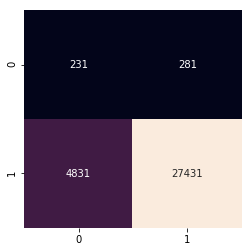

In [52]:
print('Test Confusion Matrix')
print(confusion_matrix(y_test,model.predict(test_tfidf)))
tn,fp,fn,tp=confusion_matrix(y_test,model.predict(test_tfidf)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

# Set 3

In [47]:
train_avgw2v=hstack((teacher_prefix_one_hot_train,school_state_one_hot_train,\
grade_cat_one_hot_train,categories_one_hot_train,subcategories_one_hot_train,price_one_hot_train,\
quantity_one_hot_train,avgw2v_train_essay,avgw2v_train_title,num_or_not_train
                     ,essay_count_train,title_count_train)).tocsr()
cv_avgw2v=hstack((teacher_prefix_one_hot_cv,school_state_one_hot_cv,\
grade_cat_one_hot_cv,categories_one_hot_cv,subcategories_one_hot_cv,price_one_hot_cv,\
quantity_one_hot_cv,avgw2v_cv_essay,avgw2v_cv_title,num_or_not_cv,essay_count_cv,title_count_cv)).tocsr()
test_avgw2v=hstack((teacher_prefix_one_hot_test,school_state_one_hot_test,\
grade_cat_one_hot_test,categories_one_hot_test,subcategories_one_hot_test,price_one_hot_test,\
quantity_one_hot_test,avgw2v_test_essay,avgw2v_test_title,
                    num_or_not_test,essay_count_test,title_count_test)).tocsr()
print(test_avgw2v.shape)
print(train_avgw2v.shape)
print(cv_avgw2v.shape)

(32774, 705)
(68823, 705)
(7648, 705)


In [54]:
sgd=SGDClassifier(loss='hinge')
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[10**i for i in range(-7,1)],'penalty':['l1','l2']}
clf=GridSearchCV(sgd,parameters,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(train_avgw2v,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [55]:
clf.best_params_

{'alpha': 1e-07, 'penalty': 'l1'}

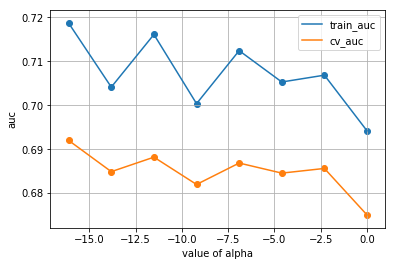

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]


In [61]:
import math
alpha=[10**i for i in range(-7,1)]
log_alpha=[math.log(i) for i in alpha]
plt.plot(log_alpha,train_auc[:8],label='train_auc')
plt.plot(log_alpha,cv_auc[:8],label='cv_auc')
plt.legend()
plt.scatter(log_alpha,train_auc[:8])
plt.scatter(log_alpha,cv_auc[:8])
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of alpha')
plt.show()
print(alpha)

In [48]:
train_auc=[]
cv_auc=[]
alpha=[10**i for i in range(-7,1)]
for alf in tqdm(alpha):
    model=SGDClassifier(loss='hinge',alpha=alf,penalty='l2')
    model.fit(train_avgw2v,y_train)
    y_train_prob=[]
    y_train_prob=model.decision_function(train_avgw2v)
    y_cv_prob=[]
    y_cv_prob=model.decision_function(cv_avgw2v)
    train_auc.append(roc_auc_score(y_train,y_train_prob))
    cv_auc.append(roc_auc_score(y_cv,y_cv_prob))

100%|██████████| 8/8 [05:46<00:00, 25.16s/it]


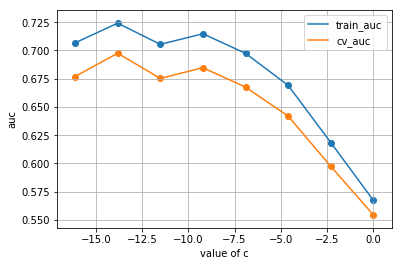

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]


In [49]:
import math
alpha=[10**i for i in range(-7,1)]
log_alpha=[math.log(i) for i in alpha]
plt.plot(log_alpha,train_auc,label='train_auc')
plt.plot(log_alpha,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(log_alpha,train_auc)
plt.scatter(log_alpha,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of c')
plt.show()
print(alpha)

In [50]:
train_auc=[]
cv_auc=[]
alpha=[10**i for i in range(-7,1)]
for alf in tqdm(alpha):
    model=SGDClassifier(loss='hinge',alpha=alf,penalty='l1')
    model.fit(train_avgw2v,y_train)
    y_train_prob=[]
    y_train_prob=model.decision_function(train_avgw2v)
    y_cv_prob=[]
    y_cv_prob=model.decision_function(cv_avgw2v)
    train_auc.append(roc_auc_score(y_train,y_train_prob))
    cv_auc.append(roc_auc_score(y_cv,y_cv_prob))

100%|██████████| 8/8 [15:49<00:00, 68.69s/it] 


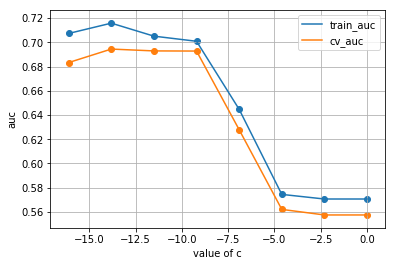

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]


In [51]:
import math
alpha=[10**i for i in range(-7,1)]
log_alpha=[math.log(i) for i in alpha]
plt.plot(log_alpha,train_auc,label='train_auc')
plt.plot(log_alpha,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(log_alpha,train_auc)
plt.scatter(log_alpha,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of c')
plt.show()
print(alpha)

In [52]:
best_alpha =1e-06
from sklearn.metrics import roc_curve,auc
model=SGDClassifier(alpha=best_alpha,penalty='l2',loss='hinge')
model.fit(train_avgw2v,y_train)
y_train_pred=[]
y_train_pred=model.decision_function(train_avgw2v)
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_train_pred)
y_test_pred=[]
y_test_pred=model.decision_function(test_avgw2v)
fpr_test,tpr_test,thresholds_test=roc_curve(y_test,y_test_pred)

Text(0,0.5,'True positive rate')

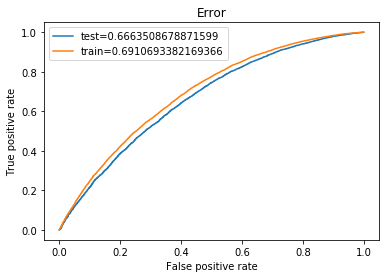

In [53]:
plt.title('Error')
plt.plot(fpr_test,tpr_test,label='test='+str(auc(fpr_test,tpr_test)))
plt.plot(fpr_train,tpr_train,label='train='+str(auc(fpr_train,tpr_train)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Train Confusion Matrix
[[ 4682  5671]
 [ 9215 49255]]


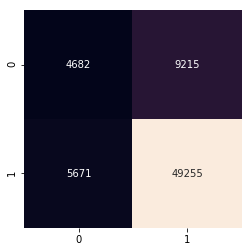

In [63]:
print('Train Confusion Matrix')
print(confusion_matrix(y_train,model.predict(train_avgw2v)))
tn,fp,fn,tp=confusion_matrix(y_train,model.predict(train_avgw2v)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

Test Confusion Matrix
[[ 2162  2900]
 [ 4554 23158]]


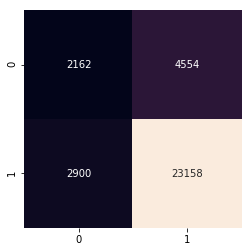

In [64]:
print('Test Confusion Matrix')
print(confusion_matrix(y_test,model.predict(test_avgw2v)))
tn,fp,fn,tp=confusion_matrix(y_test,model.predict(test_avgw2v)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

# SET 4

In [57]:
train_tfidfw2v=hstack((teacher_prefix_one_hot_train,school_state_one_hot_train,\
grade_cat_one_hot_train,categories_one_hot_train,subcategories_one_hot_train,price_one_hot_train,\
quantity_one_hot_train,wtw2v_train_essay,wtw2v_train_title,num_or_not_train,essay_count_train,
                       title_count_train)).tocsr()

cv_tfidfw2v=hstack((teacher_prefix_one_hot_cv,school_state_one_hot_cv,\
grade_cat_one_hot_cv,categories_one_hot_cv,subcategories_one_hot_cv,price_one_hot_cv,\
quantity_one_hot_cv,wtw2v_cv_essay,wtw2v_cv_title,num_or_not_cv,essay_count_cv,title_count_cv)).tocsr()

test_tfidfw2v=hstack((teacher_prefix_one_hot_test,school_state_one_hot_test,\
grade_cat_one_hot_test,categories_one_hot_test,subcategories_one_hot_test,price_one_hot_test,\
quantity_one_hot_test,wtw2v_test_essay,wtw2v_test_title,num_or_not_test,
                      essay_count_test,title_count_test)).tocsr()

print(test_tfidfw2v.shape)
print(train_tfidfw2v.shape)
print(cv_tfidfw2v.shape)

(32774, 705)
(68823, 705)
(7648, 705)


In [66]:
sgd=SGDClassifier(loss='hinge')
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[10**i for i in range(-7,1)],'penalty':['l2','l1']}
clf=GridSearchCV(sgd,parameters,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(train_tfidfw2v,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [67]:
clf.best_params_

{'alpha': 0.001, 'penalty': 'l2'}

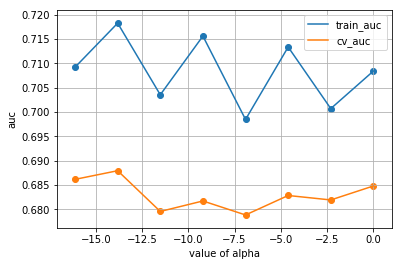

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]


In [68]:

alpha=[10**i for i in range(-7,1)]
log_alpha=[math.log(i) for i in alpha]
plt.plot(log_alpha,train_auc[:8],label='train_auc')
plt.plot(log_alpha,cv_auc[:8],label='cv_auc')
plt.legend()
plt.scatter(log_alpha,train_auc[:8])
plt.scatter(log_alpha,cv_auc[:8])
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of alpha')
plt.show()
print(alpha)

In [76]:
train_auc=[]
cv_auc=[]
alpha=[10**i for i in range(-7,1)]
for alf in tqdm(alpha):
    model=SGDClassifier(loss='hinge',alpha=alf,penalty='l1')
    model.fit(train_tfidfw2v,y_train)
    y_train_prob=[]
    y_train_prob=model.decision_function(train_tfidfw2v)
    y_cv_prob=[]
    y_cv_prob=model.decision_function(cv_tfidfw2v)
    train_auc.append(roc_auc_score(y_train,y_train_prob))
    cv_auc.append(roc_auc_score(y_cv,y_cv_prob))

100%|██████████| 8/8 [12:48<00:00, 60.03s/it] 


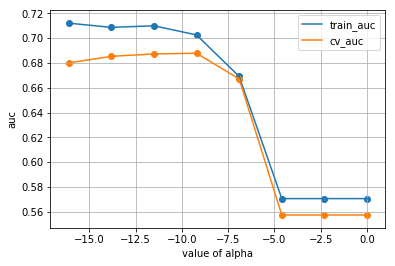

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]


In [77]:
alpha=[10**i for i in range(-7,1)]
log_alpha=[math.log(i) for i in alpha]
plt.plot(log_alpha,train_auc,label='train_auc')
plt.plot(log_alpha,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(log_alpha,train_auc)
plt.scatter(log_alpha,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of alpha')
plt.show()
print(alpha)

In [72]:
best_alpha =0.001
from sklearn.metrics import roc_curve,auc
model=SGDClassifier(alpha=best_alpha,penalty='l1',loss='hinge')
model.fit(train_tfidfw2v,y_train)
y_train_pred=[]
y_train_pred=model.decision_function(train_tfidfw2v)
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_train_pred)
y_test_pred=[]
y_test_pred=model.decision_function(test_tfidfw2v)
fpr_test,tpr_test,thresholds_test=roc_curve(y_test,y_test_pred)

Text(0,0.5,'True positive rate')

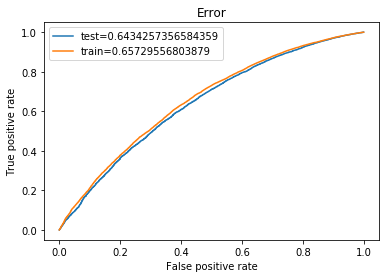

In [73]:
plt.title('Error')
plt.plot(fpr_test,tpr_test,label='test='+str(auc(fpr_test,tpr_test)))
plt.plot(fpr_train,tpr_train,label='train='+str(auc(fpr_train,tpr_train)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Train Confusion Matrix
[[   96 10257]
 [   48 58422]]


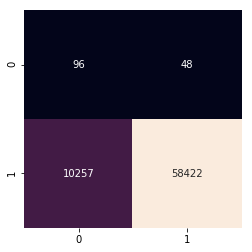

In [58]:
print('Train Confusion Matrix')
print(confusion_matrix(y_train,model.predict(train_tfidfw2v)))
tn,fp,fn,tp=confusion_matrix(y_train,model.predict(train_tfidfw2v)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

Test Confusion Matrix
[[   38  5024]
 [   40 27672]]


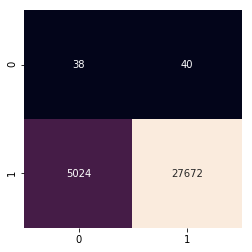

In [59]:
print('Test Confusion Matrix')
print(confusion_matrix(y_test,model.predict(test_tfidfw2v)))
tn,fp,fn,tp=confusion_matrix(y_test,model.predict(test_tfidfw2v)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

In [ ]:
### Only 10000 datapoints is taken because of memory error

In [70]:
school_state_one_hot_cv=school_state_one_hot_cv[:10000]
school_state_one_hot_train=school_state_one_hot_train[:10000]
school_state_one_hot_test=school_state_one_hot_test[:10000]
quantity_one_hot_cv=quantity_one_hot_cv[:10000]
quantity_one_hot_train=quantity_one_hot_train[:10000]
quantity_one_hot_test=quantity_one_hot_test[:10000]
price_one_hot_cv=price_one_hot_cv[:10000]
price_one_hot_train=price_one_hot_train[:10000]
price_one_hot_test=price_one_hot_test[:10000]

subcategories_one_hot_cv=subcategories_one_hot_cv[:10000]
subcategories_one_hot_train=subcategories_one_hot_train[:10000]
subcategories_one_hot_test=subcategories_one_hot_test[:10000]
categories_one_hot_cv=categories_one_hot_cv[:10000]
categories_one_hot_train=categories_one_hot_train[:10000]
categories_one_hot_test=categories_one_hot_test[:10000]
grade_cat_one_hot_cv=grade_cat_one_hot_cv[:10000]
grade_cat_one_hot_train=grade_cat_one_hot_train[:10000]
grade_cat_one_hot_test=grade_cat_one_hot_test[:10000]
teacher_prefix_one_hot_cv=teacher_prefix_one_hot_cv[:10000]
teacher_prefix_one_hot_train=teacher_prefix_one_hot_train[:10000]
teacher_prefix_one_hot_test=teacher_prefix_one_hot_test[:10000]

In [73]:
pos_train_essay=x_train['pos_essay'].values.reshape(-1,1)[:10000]
neg_train_essay=x_train['neg_essay'].values.reshape(-1,1)[:10000]
com_train_essay=x_train['com_essay'].values.reshape(-1,1)[:10000]
pos_cv_essay=x_cv['pos_essay'].values.reshape(-1,1)[:10000]
neg_cv_essay=x_cv['neg_essay'].values.reshape(-1,1)[:10000]
com_cv_essay=x_cv['com_essay'].values.reshape(-1,1)[:10000]
pos_test_essay=x_test['pos_essay'].values.reshape(-1,1)[:10000]
neg_test_essay=x_test['neg_essay'].values.reshape(-1,1)[:10000]
com_test_essay=x_test['com_essay'].values.reshape(-1,1)[:10000]

In [76]:
num_or_not_train=x_train['project_sumry_digit'].values.reshape(-1,1)[:10000]
num_or_not_test=x_test['project_sumry_digit'].values.reshape(-1,1)[:10000]
num_or_not_cv=x_cv['project_sumry_digit'].values.reshape(-1,1)[:10000]
essay_count_train=x_train['essay_Count'].values.reshape(-1,1)[:10000]
essay_count_test=x_test['essay_Count'].values.reshape(-1,1)[:10000]
essay_count_cv=x_cv['essay_Count'].values.reshape(-1,1)[:10000]
title_count_train=x_train['title_Count'].values.reshape(-1,1)[:10000]
title_count_test=x_test['title_Count'].values.reshape(-1,1)[:10000]
title_count_cv=x_cv['title_Count'].values.reshape(-1,1)[:10000]

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [22]:
tfidf_train_essay.shape

(68823, 13888)

In [25]:
from sklearn.decomposition import TruncatedSVD
decompos=TruncatedSVD(10000)
decompos.fit(tfidf_train_essay)

TruncatedSVD(algorithm='randomized', n_components=10000, n_iter=5,
             random_state=None, tol=0.0)

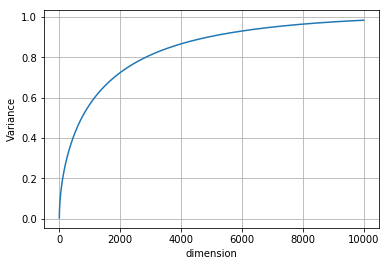

In [26]:
plt.plot(np.cumsum(decompos.explained_variance_ratio_))
plt.xlabel('dimension')
plt.ylabel('Variance')
plt.grid()

In [82]:
tfidf_train=decompos.transform(tfidf_train_essay[:10000])
tfidf_cv=decompos.transform(tfidf_cv_essay[:10000])

In [93]:
tfidf_test=decompos.transform(tfidf_test_essay[:10000])

In [83]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
train_sentiment=hstack((teacher_prefix_one_hot_train,school_state_one_hot_train,num_or_not_train,\
grade_cat_one_hot_train,categories_one_hot_train,subcategories_one_hot_train,price_one_hot_train,\
quantity_one_hot_train,com_train_essay,pos_train_essay,neg_train_essay,essay_count_train,title_count_train,tfidf_train)).tocsr()
cv_sentiment=hstack((teacher_prefix_one_hot_cv,school_state_one_hot_cv,num_or_not_cv,\
grade_cat_one_hot_cv,categories_one_hot_cv,subcategories_one_hot_cv,price_one_hot_cv,\
quantity_one_hot_cv,com_cv_essay,pos_cv_essay,neg_cv_essay,essay_count_cv,title_count_cv,tfidf_cv)).tocsr()
print(train_sentiment.shape)
print(cv_sentiment.shape)

(10000, 10108)
(7648, 10108)


In [94]:
test_sentiment=hstack((teacher_prefix_one_hot_test,school_state_one_hot_test,num_or_not_test,\
grade_cat_one_hot_test,categories_one_hot_test,subcategories_one_hot_test,price_one_hot_test,\
quantity_one_hot_test,com_test_essay,pos_test_essay,neg_test_essay,essay_count_test,title_count_test,tfidf_test)).tocsr()
print(train_sentiment.shape)

(10000, 10108)


In [86]:
train_auc=[]
cv_auc=[]
alpha=[10**i for i in range(-10,-1)]
for alf in tqdm(alpha):
    model=SGDClassifier(loss='hinge',alpha=alf,penalty='l1')
    model.fit(train_sentiment,y_train[:10000])
    y_train_prob=[]
    y_train_prob=model.decision_function(train_sentiment)
    y_cv_prob=[]
    y_cv_prob=model.decision_function(cv_sentiment)
    train_auc.append(roc_auc_score(y_train[:10000],y_train_prob))
    cv_auc.append(roc_auc_score(y_cv[:10000],y_cv_prob))

100%|██████████| 9/9 [38:34<00:00, 264.51s/it]


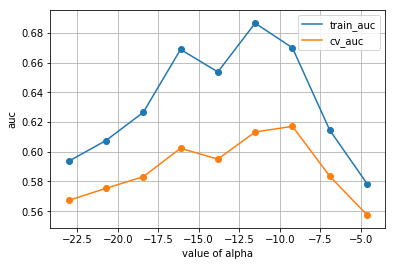

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]


In [88]:
import math
alpha=[10**i for i in range(-10,-1)]
log_alpha=[math.log(i) for i in alpha]
plt.plot(log_alpha,train_auc,label='train_auc')
plt.plot(log_alpha,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(log_alpha,train_auc)
plt.scatter(log_alpha,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of alpha')
plt.show()
print(alpha)

In [89]:
train_auc=[]
cv_auc=[]
alpha=[10**i for i in range(-10,-1)]
for alf in tqdm(alpha):
    model=SGDClassifier(loss='hinge',alpha=alf,penalty='l2')
    model.fit(train_sentiment,y_train[:10000])
    y_train_prob=[]
    y_train_prob=model.decision_function(train_sentiment)
    y_cv_prob=[]
    y_cv_prob=model.decision_function(cv_sentiment)
    train_auc.append(roc_auc_score(y_train[:10000],y_train_prob))
    cv_auc.append(roc_auc_score(y_cv[:10000],y_cv_prob))

100%|██████████| 9/9 [08:37<00:00, 65.63s/it]


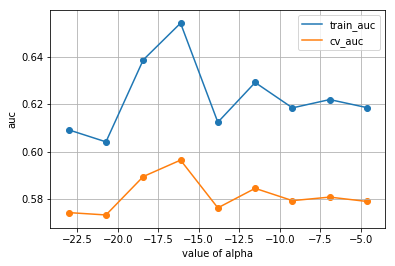

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]


In [90]:
alpha=[10**i for i in range(-10,-1)]
log_alpha=[math.log(i) for i in alpha]
plt.plot(log_alpha,train_auc,label='train_auc')
plt.plot(log_alpha,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(log_alpha,train_auc)
plt.scatter(log_alpha,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of alpha')
plt.show()
print(alpha)

In [95]:
best_alpha =1e-5
from sklearn.metrics import roc_curve,auc
model=SGDClassifier(alpha=best_alpha,penalty='l1',loss='hinge')
model.fit(train_sentiment,y_train[:10000])
y_train_pred=[]
y_train_pred=model.decision_function(train_sentiment)
fpr_train,tpr_train,thresholds_train=roc_curve(y_train[:10000],y_train_pred)
y_test_pred=[]
y_test_pred=model.decision_function(test_sentiment)
fpr_test,tpr_test,thresholds_test=roc_curve(y_test[:10000],y_test_pred)

Text(0,0.5,'True positive rate')

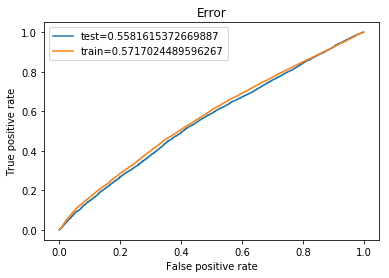

In [96]:
plt.title('Error')
plt.plot(fpr_test,tpr_test,label='test='+str(auc(fpr_test,tpr_test)))
plt.plot(fpr_train,tpr_train,label='train='+str(auc(fpr_train,tpr_train)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Train Confusion Matrix
[[   4 1496]
 [   1 8499]]


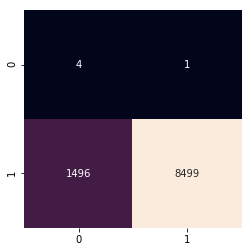

In [102]:
print('Train Confusion Matrix')

y_train=y_train[:10000]
print(confusion_matrix(y_train,model.predict(train_sentiment)))

tn,fp,fn,tp=confusion_matrix(y_train,model.predict(train_sentiment)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

Test Confusion Matrix
[[   2 1522]
 [   1 8475]]


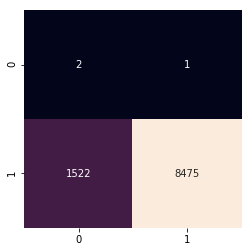

In [103]:
print('Test Confusion Matrix')
print(confusion_matrix(y_test[:10000],model.predict(test_sentiment)))
tn,fp,fn,tp=confusion_matrix(y_test[:10000],model.predict(test_sentiment)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

<h1>3. Conclusion</h1>

In [106]:

from prettytable import PrettyTable
table=PrettyTable()
table.field_names=['Set','hyperparameter','Regularization','AUC']
table.add_row(['BOW','0.001','L2','0.68'])
table.add_row(['TFIDF','1e-07','L1','0.65'])
table.add_row(['AVGW2V','1e-06','L2','0.66'])
table.add_row(['TFIDFW2V','0.001','L1','0.64'])
table.add_row(['Sentiment','1e-05','L1','0.57'])
print(table)

+-----------+----------------+----------------+------+
|    Set    | hyperparameter | Regularization | AUC  |
+-----------+----------------+----------------+------+
|    BOW    |     0.001      |       L2       | 0.68 |
|   TFIDF   |     1e-07      |       L1       | 0.65 |
|   AVGW2V  |     1e-06      |       L2       | 0.66 |
|  TFIDFW2V |     0.001      |       L1       | 0.64 |
| Sentiment |     1e-05      |       L1       | 0.57 |
+-----------+----------------+----------------+------+
